# Networks

- What is a "network?"

[https://observablehq.com/@d3/force-directed-graph](https://observablehq.com/@d3/force-directed-graph)

- nodes
- edges

In [1]:
library('ggraph')
library('igraph')
library('tidyverse')
highschool = highschool %>% as_tibble

Loading required package: ggplot2


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::%--%()      masks igraph::%--%()
✖ dplyr::as_data_frame() masks tibble::as_data_frame(), igraph::as_data_frame()
✖ purrr::compose()       masks igraph::compose()
✖ tidyr::crossing()      masks igraph::crossing()
✖ dplyr::filter()        masks stats::filter()
✖ dplyr::lag()           masks stats::lag()
✖ purrr::simplify()      masks igraph::simplify()
ℹ Use the conflicted package (<http://conflic

In [2]:
highschool %>% print

# A tibble: 506 × 3
    from    to  year
   <dbl> <dbl> <dbl>
 1     1    14  1957
 2     1    15  1957
 3     1    21  1957
 4     1    54  1957
 5     1    55  1957
 6     2    21  1957
 7     2    22  1957
 8     3     9  1957
 9     3    15  1957
10     4     5  1957
# ℹ 496 more rows


Using "stress" as default layout
Warning message:
“Using the `size` aesthetic in this geom was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` in the `default_aes` field and elsewhere instead.”


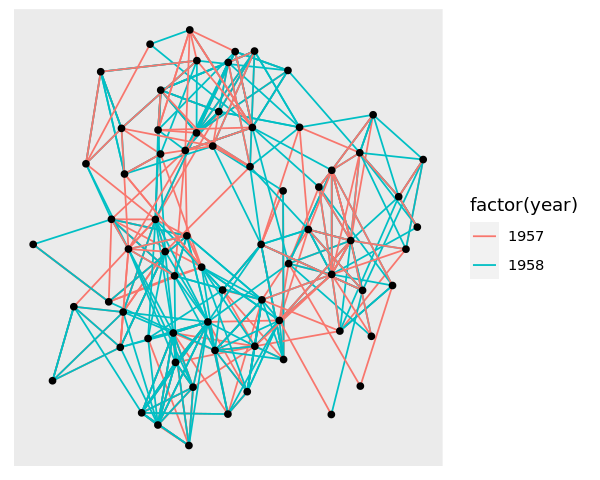

In [3]:
options(repr.plot.width = 5, repr.plot.height = 4)
# from the ggraph tutorial https://www.data-imaginist.com/2017/ggraph-introduction-layouts/

p = ggraph(highschool) 

p = p + geom_edge_link(aes(colour = factor(year))) 

p = p + geom_node_point()

p

- What are the points?
- What are the lines?

## Layouts

Using "stress" as default layout


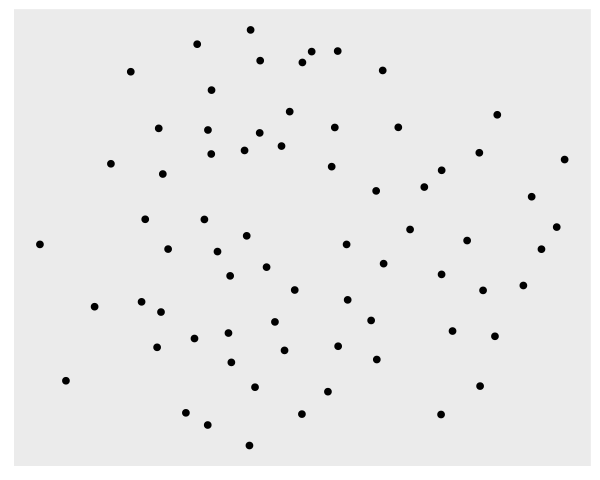

In [4]:
ggraph(highschool) + geom_node_point()

In [5]:
# ggraph(highschool) + geom_edge_

[https://www.data-imaginist.com/2017/ggraph-introduction-layouts/](https://www.data-imaginist.com/2017/ggraph-introduction-layouts/)

## Hierarchies

- [https://observablehq.com/@d3/d3-hierarchy?collection=@d3/d3-hierarchy](https://observablehq.com/@d3/d3-hierarchy?collection=@d3/d3-hierarchy)
- [https://observablehq.com/@d3/hierarchical-edge-bundling/2?collection=@d3/d3-hierarchy](https://observablehq.com/@d3/hierarchical-edge-bundling/2?collection=@d3/d3-hierarchy)
- [https://observablehq.com/@d3/circle-packing-monochrome?collection=@d3/d3-hierarchy](https://observablehq.com/@d3/circle-packing-monochrome?collection=@d3/d3-hierarchy)

In [5]:
d = dist(iris[, 1:4])
d %>% head

[1] 0.5385165 0.5099020 0.6480741 0.1414214 0.6164414 0.5196152

In [6]:
iris %>% as_tibble %>% print

# A tibble: 150 × 5
   Sepal.Length Sepal.Width Petal.Length Petal.Width Species
          <dbl>       <dbl>        <dbl>       <dbl> <fct>  
 1          5.1         3.5          1.4         0.2 setosa 
 2          4.9         3            1.4         0.2 setosa 
 3          4.7         3.2          1.3         0.2 setosa 
 4          4.6         3.1          1.5         0.2 setosa 
 5          5           3.6          1.4         0.2 setosa 
 6          5.4         3.9          1.7         0.4 setosa 
 7          4.6         3.4          1.4         0.3 setosa 
 8          5           3.4          1.5         0.2 setosa 
 9          4.4         2.9          1.4         0.2 setosa 
10          4.9         3.1          1.5         0.1 setosa 
# ℹ 140 more rows


In [7]:
# ?dist

In [8]:
cl = hclust(d) %>% as.dendrogram
cl

'dendrogram' with 2 branches and 150 members total, at height 7.085196 

In [10]:
# plot(cl)

In [11]:
# ?hclust

In [9]:
library('tidygraph')


Attaching package: ‘tidygraph’


The following object is masked from ‘package:igraph’:

    groups


The following object is masked from ‘package:stats’:

    filter




In [10]:
iris_tree = as_tbl_graph(cl)
iris_tree

# A tbl_graph: 299 nodes and 298 edges
#
# A rooted tree
#
# A tibble: 299 × 4
  height leaf  label members
   <dbl> <lgl> <chr>   <int>
1  0     TRUE  "108"       1
2  0     TRUE  "131"       1
3  0.265 FALSE ""          2
4  0     TRUE  "103"       1
5  0     TRUE  "126"       1
6  0     TRUE  "130"       1
# ℹ 293 more rows
#
# A tibble: 298 × 2
   from    to
  <int> <int>
1     3     1
2     3     2
3     7     5
# ℹ 295 more rows

## Access nodes or edges table

In [14]:
# ?activate

In [11]:
iris_tree %>%
    activate(nodes) %>%
    print

# A tbl_graph: 299 nodes and 298 edges
#
# A rooted tree
#
# A tibble: 299 × 4
  height leaf  label members
   <dbl> <lgl> <chr>   <int>
1  0     TRUE  "108"       1
2  0     TRUE  "131"       1
3  0.265 FALSE ""          2
4  0     TRUE  "103"       1
5  0     TRUE  "126"       1
6  0     TRUE  "130"       1
# ℹ 293 more rows
#
# A tibble: 298 × 2
   from    to
  <int> <int>
1     3     1
2     3     2
3     7     5
# ℹ 295 more rows


In [12]:
iris %>% as_tibble %>% print

# A tibble: 150 × 5
   Sepal.Length Sepal.Width Petal.Length Petal.Width Species
          <dbl>       <dbl>        <dbl>       <dbl> <fct>  
 1          5.1         3.5          1.4         0.2 setosa 
 2          4.9         3            1.4         0.2 setosa 
 3          4.7         3.2          1.3         0.2 setosa 
 4          4.6         3.1          1.5         0.2 setosa 
 5          5           3.6          1.4         0.2 setosa 
 6          5.4         3.9          1.7         0.4 setosa 
 7          4.6         3.4          1.4         0.3 setosa 
 8          5           3.4          1.5         0.2 setosa 
 9          4.4         2.9          1.4         0.2 setosa 
10          4.9         3.1          1.5         0.1 setosa 
# ℹ 140 more rows


In [13]:
iris_tree2 = iris_tree %>%
    activate(nodes) %>%
    left_join(iris %>% add_rownames('label')) %>%
    mutate(Species = as.character(Species))

Warning message:
“`add_rownames()` was deprecated in dplyr 1.0.0.
ℹ Please use `tibble::rownames_to_column()` instead.”
Joining with `by = join_by(label)`


In [14]:
iris_tree2 %>% print

# A tbl_graph: 299 nodes and 298 edges
#
# A rooted tree
#
# A tibble: 299 × 9
  height leaf  label members Sepal.Length Sepal.Width Petal.Length Petal.Width
   <dbl> <lgl> <chr>   <int>        <dbl>       <dbl>        <dbl>       <dbl>
1  0     TRUE  "108"       1          7.3         2.9          6.3         1.8
2  0     TRUE  "131"       1          7.4         2.8          6.1         1.9
3  0.265 FALSE ""          2         NA          NA           NA          NA  
4  0     TRUE  "103"       1          7.1         3            5.9         2.1
5  0     TRUE  "126"       1          7.2         3.2          6           1.8
6  0     TRUE  "130"       1          7.2         3            5.8         1.6
# ℹ 293 more rows
# ℹ 1 more variable: Species <chr>
#
# A tibble: 298 × 2
   from    to
  <int> <int>
1     3     1
2     3     2
3     7     5
# ℹ 295 more rows


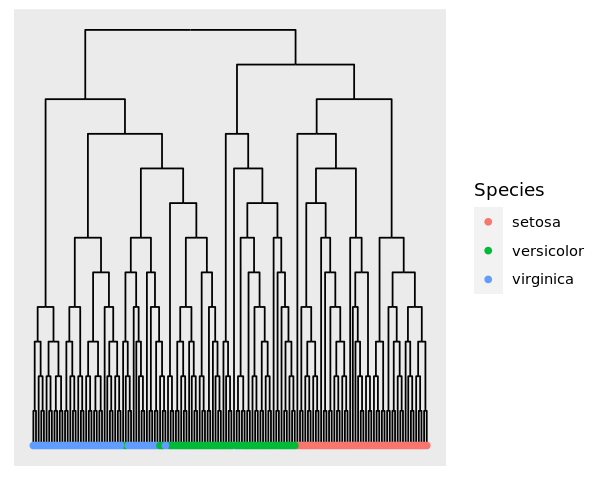

In [15]:
g = ggraph(iris_tree2, 'dendrogram')

g = g + geom_edge_elbow() 

g = g + geom_node_point(aes(color = Species, filter = leaf))

g
   

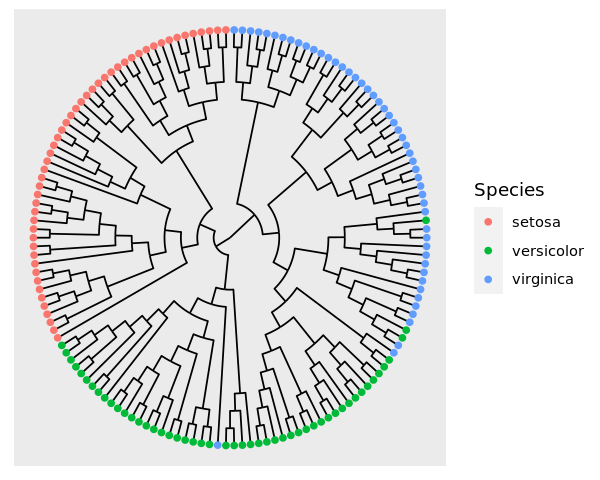

In [16]:
g = ggraph(iris_tree2, 'dendrogram', circular = TRUE)

g = g + geom_edge_elbow() 

g = g + geom_node_point(aes(color = Species, filter = leaf))

# g = g + geom_node_text(aes(label = label, filter = leaf), size = 2)

g